# python 2020年4月8日学习笔记(修订版）

### 关于使用%pylab inline和ipython --pylab的说明
    
    请参考    
    No Pylab Thanks:Please Stop using Pylab
    https://matthiasbussonnier.com/posts/10-No-PyLab-Thanks.html
    
    本人遵循“No Pylab Thanks”，标准代码使用：

```python
import numpy as np 
from matplotlib import pyplot as plt
或
import matplotlib.pyplot as plt

```
    但为了培训的代码尽量少修改，在不使用    
```python
%pylab inline
```
    或在启动ipythong时输入
```python
ipython --pylab
```
    的情况下，对培训的编程代码，前面统一加入如下的形式代码：
```python
from pylab import *
from numpy import *
```

在时间许可的情况下，我会对大部分代码修改，使其不再依赖pylab参数。

# 验证python wheel(扩展包)的威力
求100万个数据的标准差和方差!

### 只有内嵌包的Python功能很有限,Python的基本功能比较困难或低效率.
 如果用循环来实现需要的程序如下:

In [1]:
import math
def var_std(*data):
    L=len(data);  
    s=0
    for i in range(L): 
        s+=data[i]
    m=s/L
    t=0   
    for i in range(L): 
        t+=(data[i]-m)**2
    var=t/L;   
    std=math.sqrt(var)
    return (m,var,std)

In [2]:
import numpy as np
x=np.random.randint(1,500,1000)
(mean,var,std)=var_std(*x)   
print(mean,var,std)
%timeit  (mean,var,std)=var_std(*x)   
#%timeit测试一行代码的运行时间

252.896 19789.859184 140.67643435913493
2.94 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 使用numpy数组扩展包,求100万个数据的标准差和方差就变得非常简单

In [3]:
import numpy as np
data=np.random.randint(1,500,1000);
var,std=data.var(),data.std()
print(var,std)
%timeit var,std=data.var(),data.std()

20931.821884 144.6783393739367
48.9 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# 验证numpy包的安装：

## 1.使用numpy解线性代数方程：

求解如下4元1次方程组
$$
\left\{
\begin{matrix}
17x+5y+9z+11u=10   \\ 
7x+16y+8z+u=-5   \\ 
13x+17y=19z+3u=24   \\
5x+11y+19z=9u=4
\end{matrix}
\right.  
$$


In [4]:
import numpy as np
from numpy.linalg.linalg import solve
a=np.array([[17,5,9,11],[7,16,8,1],[13,17,19,3],[5,11,19,9]])
b=np.array([-10,-5,24,4])
X=solve(a,b)
print("X=",X)
print(a.dot(X)==b)#检验解是否满足原方程
a.dot(X)-b

X= [ 1. -2.  3. -4.]
[False  True  True False]


array([1.77635684e-15, 0.00000000e+00, 0.00000000e+00, 7.10542736e-15])

## 2.用matplotlib 画二维等值（高）线图

定义函数
$$shq(x,y)=(x^2-y^2)e^{-(0.5x^2+0.2y^2)}$$


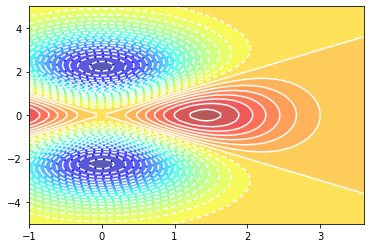

In [5]:
import numpy as np 
from matplotlib import pyplot as plt

def shq(x,y):
    return (x**2-y**2)*np.exp(-0.5*x**2-0.2*y**2)

a=3.6
b=5
x,y=np.mgrid[-1:a:50j,-b:b:60j] #返回多维结构
plt.contourf(x,y,shq(x,y),30,alpha=0.65,cmap='jet')
plt.contour(x,y,shq(x,y),30,colors='white')
plt.show()

### np.mgrid的用法

功能：返回多维结构，常见的如2D图形，3D图形

np.mgrid\[第1维，第2维 ，第3维 ， …\] 
第n维的书写形式为：

a:b:c

c表示步长，为实数表示间隔；该为长度为\[a,b),左开右闭

或：

a:b:cj

cj表示步长，为复数表示点数；该长度为\[a,b\]，左闭右闭
 
举例说明：

1）生成1D数组：

a=np.mgrid\[-4:4:3j\]
a
在\[-4,4\]区间内取3个值

返回：

array(\[-4.,  0.,  4.\])
 

2）生成个2D矩阵：

mgrid\[\[1:3:3j, 4:5:2j\]\]
生成的是3*2的矩阵

import numpy as np
x, y = np.mgrid\[1:3:3j, 4:5:2j\]


### contourf 与 contour

contour和contourf 绘制三维图
其中前两个参数x和y：两个等长一维数组，第三个参数z： 二维数组（表示平面点xi, yi映射的函数值）。
不同点在于contourf会对等高线间的区域进行填充

contour(Z) 绘制矩阵 Z 的等高线图，其中 Z 解释为有关 x-y 平面的高度。Z 必须至少是 2×2 矩阵，该矩阵包含至少两个不同值。x 值对应于 Z 的列索引，y 值对应于 Z 的行索引。自动选择等高线层级。

contour(Z,n) 以 n 个等高线层级绘制矩阵 Z 的等高线图，其中 n 为标量。自动选择等高线层级。

contour(Z,v) 绘制矩阵 Z 的等高线图，其中等高线位于单调递增向量 v 中指定的数据值。要在特定值位置显示单个等高线，请将 v 定义为一个二元素向量，并且两个元素都等于所需的等高线层级。例如，要在 k 层级绘制等高线，请使用 contour(Z,[k k])。指定向量 v 可将 LevelListMode 属性设置为 manual。

contour(X,Y,Z)、contour(X,Y,Z,n) 和 contour(X,Y,Z,v) 使用 X 和 Y 绘制 Z 的等高线图，以确定 x 和 y 值。

## 3. 画bessel函数曲线，检查scipy包可用性

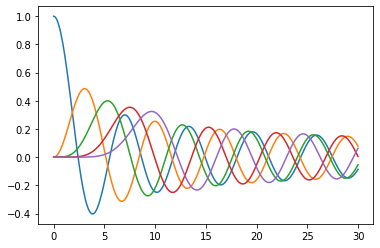

In [6]:
import numpy as np 
from matplotlib import pyplot as plt
from scipy import special as spc
x=np.linspace(0,30,300)
for i in range(0,10,2):
    plt.plot(x,spc.jn(i,x))

## 4. 多项式展开、分式简化，函数求导、积分来检验sympy包可用性

展开多项式$(x+y)^5$

In [8]:
from sympy import symbols,expand
x,y=symbols("x,y")
expand((x+y)**5)   #展开

x**5 + 5*x**4*y + 10*x**3*y**2 + 10*x**2*y**3 + 5*x*y**4 + y**5

化简多项式$\frac{1}{x+1}+\frac{1}{(x^2-1)}$

In [9]:
from sympy import symbols,simplify
x=symbols("x")
c=1/(x+1)+1/(x**2-1);
simplify(c) #简化

x/(x**2 - 1)

求导$\frac{\mathrm{d}x^4}{\mathrm{d}x}$

In [10]:
from sympy import symbols,diff,integrate
x=symbols("x")
diff(x**4,x) #求导

4*x**3

计算积分 $\int 5y^4\, dy$

In [11]:
from sympy import symbols,integrate
y=symbols("y")
integrate(5*y**4,y)#积分

y**5

## 5. 画三维数据图检查mayavi包的可用性

In [ ]:
from mayavi import mlab as mb
import numpy as np 
x,y,z=np.mgrid[-10:10:40j,-10:10:40j,-10:10:10j]
s=(2*x**2+3*y**2-0.5*z**2)*np.exp(-0.125*(x**2+y**2+z**2))
cm1="summer"
cm2="jet"
mb.points3d(x,y,z,s,colormap=cm1,opacity=0.5,mode="2dcircle")
mb.show()
mb.points3d(x,y,z,s,colormap=cm2)
mb.show()

# 体验python语言特点

## 1)解释执行!

下面的代码请在python的交互环境中执行

In [ ]:
def  mysum(x,y):
    return x+y  #定义函数

a=1400000000;b=1360000000  # 定义两个变量
c=mysum(a,b)  # 调用自定义函数
print("c=",c)  # 输出调用结果

自定义函数——对任意多个数据求和求积的自定义函数

不要任何扩展包函数，仅用Python的内核完成

In [ ]:
def sum_mul(*x):
       n=len(x)
       s=0
       p=1
       for i in x:
            s+=i
            p*=i
       return s,p

计算1连加到100和连乘到100的调用举例

In [ ]:
y=list(range(1,31))
sum,mul =sum_mul(*y)
print("sum=",sum)
print("mul=",mul) 

## 2）丰富的扩展包!

如果导入numpy包到内存，那么计算多个数据的和与积简化为调用数组实例的函数sum()和prod(),例如计算1~20的连加和连乘可以简单到


In [ ]:
import numpy as np 
x=np.array(range(1,21),dtype=np.int32)
print(x)
print(x.sum())
print(x.prod())
%whos

>测试上面两个程序，连乘法1，2，....，20可见python的基本类型具有无穷大的空间能力，可以得到正确结果，但numpy中数据有类型空间大小限制，numpy在计算时候越界得到错误的值。